
# Riddler Classic: Dungeons and Dragons

From https://fivethirtyeight.com/features/can-you-find-the-best-dungeons-dragons-strategy/

The fifth edition of Dungeons & Dragons introduced a system of “advantage and disadvantage.” When you roll a die “with advantage,” you roll the die twice and keep the higher result. Rolling “with disadvantage” is similar, except you keep the lower result instead. The rules further specify that when a player rolls with both advantage and disadvantage, they cancel out, and the player rolls a single die. Yawn!

There are two other, more mathematically interesting ways that advantage and disadvantage could be combined. First, you could have “advantage of disadvantage,” meaning you roll twice with disadvantage and then keep the higher result. Or, you could have “disadvantage of advantage,” meaning you roll twice with advantage and then keep the lower result. With a fair 20-sided die, which situation produces the highest expected roll: advantage of disadvantage, disadvantage of advantage or rolling a single die?

Extra Credit: Instead of maximizing your expected roll, suppose you need to roll N or better with your 20-sided die. For each value of N, is it better to use advantage of disadvantage, disadvantage of advantage or rolling a single die?


# Analytical Solution


## Rolling "with disadvantage"

### Rolling a 20

For a single roll, the probability of rolling the number 20 is the same as the probability of any other number:<font color='blue'> $\frac{1}{20}$</font>. More formally,


$$P[R =i]= \frac{1}{20}$$



When rolling "with advantage" we take the maximum of two rolls. So what's the probability of rolling a 20 "with disadvantage"? First, take note

* there are $20x20=400$ possible ways to roll two 20 sided 
* the probability of rolling any pair of dice is $\frac{1}{400}$, or $3%$





<img src="20-by-20-probs.png">






Now, looking at the table above, think again about what is the probability of rolling a 20 "with disadvantage"? 



Looking at all the possibilities, the only one way to roll a 20 "with disadvantage" is to roll 20 on the first roll and 20 on the second roll.




<img src="20-by-20-probs-20-advantage.png">



### What about rolling a 19 "with disadvantage"?

Referring back to our table of outcomes, we see there are three ways to roll 19 with disadvangage:

    * Die 1 = 19, Die 2 = 19
    * Die 1 = 19, Die 2 = 20
    * Die 1 = 20, Die 2 = 19




<img src="20-by-20-probs-19-advantage.png">


### What about rolling a 18 "with disadvantage"?

Again referring back to our table of outcomes, we see there are five ways to roll 19 with disadvangage:

    * Die 1 = 18, Die 2 = 18
    * Die 1 = 19, Die 2 = 18
    * Die 1 = 20, Die 2 = 18
    * Die 1 = 18, Die 2 = 19
    * Die 1 = 18, Die 2 = 20

<img src="20-by-20-probs-18-advantage.png">





### A pattern emerging?

$$ p_A[a=20] = 1 * \frac{1}{400}$$
$$ p_A[a=19] = 3 * \frac{1}{400}$$
$$ p_A[a=18] = 5 * \frac{1}{400}$$



What would you expect the $P[D=7]$? We can refer back to our table and continue to enumerate outcomes, but we can also note the next number in the arithmetic sequence should be 7 and that the probabilities for any given value can be compactly written in a formula

$$p_A[a=i]=\frac{1}{400} * ((21-i)*2-1) $$


Note $p_A[a=i]$ is read "The probability of an advantage roll being equal to i". Therefore, if we want to measure the probability of en event consiting of multiple outcomes we sum the $p_A$:

$$=P_A[a<= n] = \sum_{i=1}^n p_A[D_i]$$


## Rolling "with advantage" 

Refer back to the table of outcome probabilitie for rolling two die and think about the probability of rolling of 1 "with advantage". There's exactly 1 way to do it: Rolling a 1 on both the first and second roll. Extending to the event of rolling a three "with advantage", we see there are exactly 3 outcomes: 
   
    1. (1,1)
    2. (2,1)
    3. (1,2)

### The pattern returns

Applying the same logic in reverse, we see a similar pattern emerge, were the number of outcomes begins at 1 and continues in increments of 2

$$ p_D[d=1] = 1 * \frac{1}{400}$$
$$ P_D[d=2] = 3 * \frac{1}{400}$$
$$ P_D[d=3] = 5 * \frac{1}{400}$$


We can thus write the probability of a disadvantage roll being equal to i as 


$$p_D[D = i]=\frac{1}{400} * i*2-1 $$

And if we want to measure the probability multiple possible rolls, we can use the form 


$$=P_A[a<= n] = \sum_{i=1}^n p_A[D_i]$$


## "Advantage of Disadvantage"

So we have a formala for advantage along with a formulat for disadvantage. What about the maximum of two rolls "with disadvantage"? Seems daunting, but maybe another pattern will emerge if we start simple and begin at the boundary....


What is the probability of rolling a 1 with "advantage of disadvantage"? 

If we let

$X_1 := $ First roll with disadvantage 
$X_2 :=$ Second roll with disadvantage 


then rolling a one with advantage of disadvantage is the probability of rolling a 1 on both advantage rolls. 

$$p[X1<=1, X2<=1] = p_X1[x1=1]*p_X2[x2 =1]$$

## "Disadvantage of Advantage"

We can use the same reasoning for probabilities when rolling with disadvantage of advantage:

Let
 
$Y1$ =  First roll with disadvantage of advantage
$Y2$ = Second roll with disadvantage of advantage


$$p[Y1<=y1, Y2<=y2] = p_Y1[y1=1]*p_Y2[y2 =1]$$


In [9]:
import numpy as np
import pandas as pd
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange


In [10]:
def pdf_disadvantage(val):
    try: 
        val<=20
    except ValueError:
        print("What. The. Fuck.")
        
    return (((20-val)+1)*2-1) * (1/(20*20))

In [11]:
def pdf_advantage(val):
    try: 
        val<=20
    except ValueError:
        print("What. The. Fuck.")
        
    return (val*2-1)*(1/(20*20))

In [12]:
import seaborn as sns
def generate_disadvantage_pdf():
    
    advantage_df = pd.DataFrame({'roll':range(1,21)})
    advantage_df['probability'] = advantage_df['roll'].apply(pdf_disadvantage)
    sns.set(style="whitegrid", rc={'figure.figsize':(11.7,8.27)})
    sns.barplot(x="roll", y="probability", data=advantage_df)
    

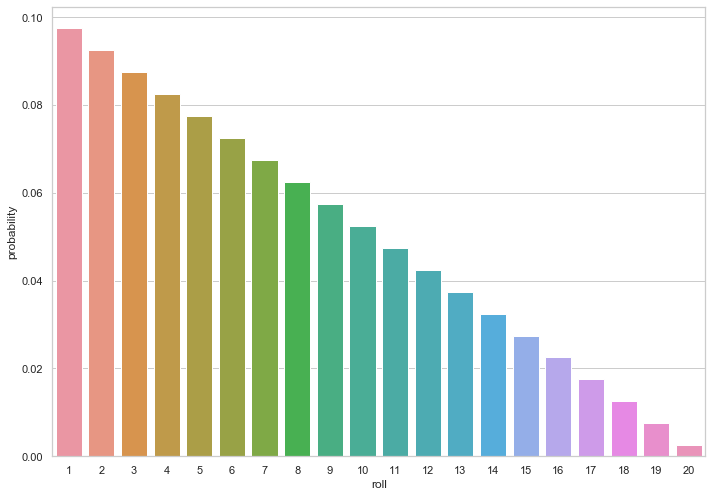

In [13]:
generate_disadvantage_pdf()

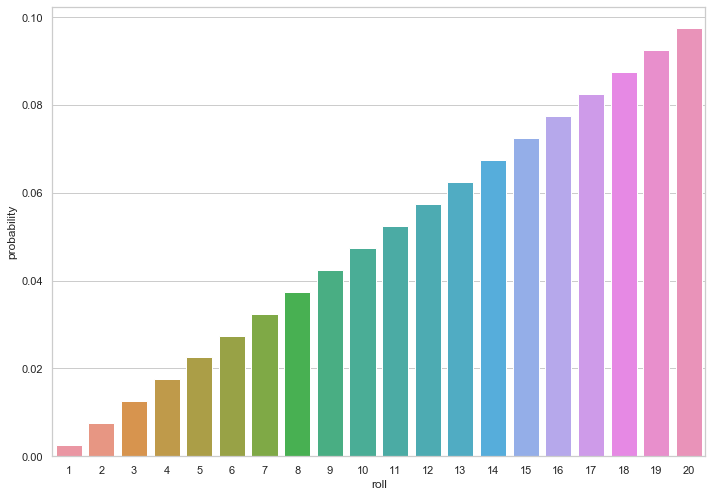

In [34]:
generate_advantage_pdf()

In [15]:
print("Expected Value of Disadvantage: ", np.sum([pdf_disadvantage(i)*i  for i in np.arange(1,21)]))

Expected Value of Disadvantage:  7.175


In [16]:
print("Expected Value of Advantage: ",np.sum([pdf_advantage(i)*i  for i in np.arange(1,21)]))

Expected Value of Advantage:  13.825


In [17]:
import seaborn as sns
def generate_advantage_pdf():
    
    advantage_df = pd.DataFrame({'roll':range(1,21)})
    advantage_df['probability'] = advantage_df['roll'].apply(pdf_advantage)
    sns.set(style="whitegrid", rc={'figure.figsize':(11.7,8.27)})
    sns.barplot(x="roll", y="probability", data=advantage_df)

## Rolling Disadvantage of "with Advantage"


Minimum of two advantage rolls 

    * X = Advantage roll 1 
    * Y = Advantage roll 2
    
    
$$min[X,Y]$$



Since $X$ and $Y$ are rolled independently we can 


In [18]:
outcomes = {}
for roll_1 in range(1, 21):
    for roll_2 in range(1,21):
        outcomes[(roll_1, roll_2)]=pdf_advantage(roll_1)*pdf_advantage(roll_2)

In [41]:
def get_pdf_df_dis_of_adv():
    outcomes = {}
    for roll_1 in range(1, 21):
        for roll_2 in range(1,21):
            outcomes[(roll_1, roll_2)]=pdf_advantage(roll_1)*pdf_advantage(roll_2)
    pdf ={}
    for outcome in outcomes.keys():
        disadvantage_outcome=np.min(outcome)
        if disadvantage_outcome not in pdf.keys():
            pdf[disadvantage_outcome] = outcomes[outcome]
        else:
            pdf[disadvantage_outcome] += outcomes[outcome]
    dis_of_adv_df = pd.DataFrame.from_dict(pdf, orient='index', columns = ['probability'])
    dis_of_adv_df['roll'] =dis_of_adv_df.index
    dis_of_adv_df['Type'] = 'Dis of Adv'
    dis_of_adv_df['CMF'] = dis_of_adv_df['probability'].cumsum()
    dis_of_adv_df['CMF Rev'] = dis_of_adv_df.loc[::-1, 'probability'].cumsum()[::-1]
    return dis_of_adv_df

In [20]:
def generate_disadvantage_of_advantage_pdf():
    
    d_of_a_pdf = get_pdf_df_dis_of_adv()
    sns.set(style="whitegrid", rc={'figure.figsize':(11.7,8.27)})
    sns.barplot(x="roll", y="probability", data=d_of_a_pdf)

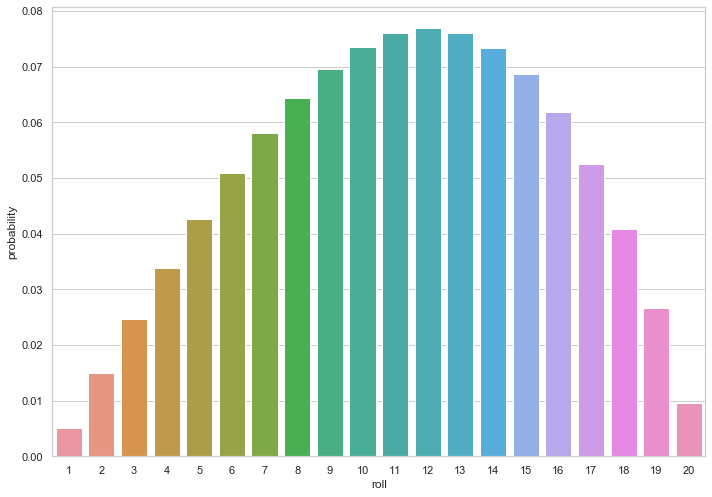

In [21]:
generate_disadvantage_of_advantage_pdf()

In [40]:
def get_pdf_df_adv_of_disadv():
    outcomes = {}
    for roll_1 in range(1, 21):
        for roll_2 in range(1,21):
            outcomes[(roll_1, roll_2)]=pdf_disadvantage(roll_1)*pdf_disadvantage(roll_2)
    pdf ={}
    for outcome in outcomes.keys():
        advantage_outcome=np.max(outcome)
        if advantage_outcome not in pdf.keys():
            pdf[advantage_outcome] = outcomes[outcome]
        else:
            pdf[advantage_outcome] += outcomes[outcome]
    a_of_d_df = pd.DataFrame.from_dict(pdf, orient='index', columns = ['probability'])
    a_of_d_df['roll'] =a_of_d_df.index
    a_of_d_df['Type'] ='Adv of Disad'
    a_of_d_df['CMF'] = a_of_d_df['probability'].cumsum()
    a_of_d_df['CMF Rev'] = a_of_d_df.loc[::-1, 'probability'].cumsum()[::-1]
    return a_of_d_df
#get_pdf_df_adv_of_disadv()

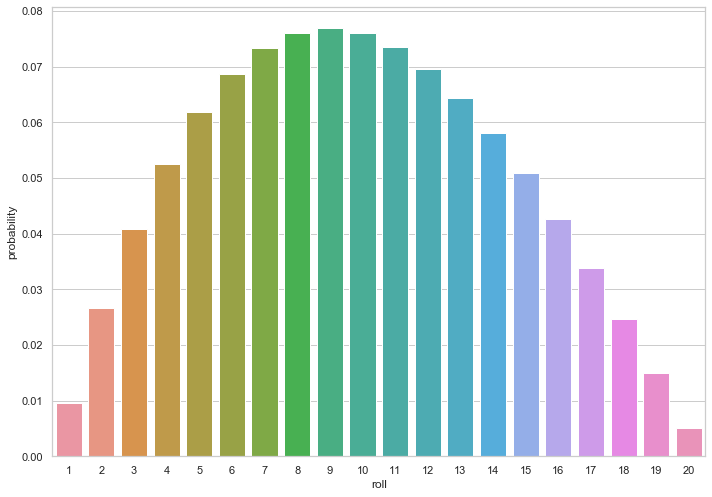

In [29]:
def generate_disadvantage_of_advantage_pdf():
    
    a_of_d = get_pdf_df_adv_of_disadv()
    sns.set(style="whitegrid", rc={'figure.figsize':(11.7,8.27)})
    sns.barplot(x="roll", y="probability", data=a_of_d)

generate_disadvantage_of_advantage_pdf()

In [63]:
def get_expected_values():
    a_of_d = get_pdf_df_adv_of_disadv()
    d_of_a = get_pdf_df_dis_of_adv()
    
    return {'Adv of Dis': np.dot(a_of_d['roll'], a_of_d['probability']), 
            'Dis of Adv': np.dot(d_of_a['roll'], d_of_a['probability'])}

In [64]:
get_expected_values()

{'Adv of Dis': 9.8333375, 'Dis of Adv': 11.166662500000001}

In [95]:
def make_single_roll_df():
    df = pd.DataFrame({'roll':range(1,21)})
    df['probability'] = 1/20
    df['Type'] = 'Single Roll'
    df['CMF'] = df['probability'].cumsum()
    df['CMF Rev'] = df.loc[::-1, 'probability'].cumsum()[::-1]
    return df
#make_single_roll_df()

In [108]:
def make_line_plot(yaxis='probability'):
    roll_df = get_pdf_df_adv_of_disadv().\
                append(get_pdf_df_dis_of_adv()).\
                append(make_single_roll_df())
    
    sns.set(rc={'figure.figsize':(18,18)})
    sns.barplot(x='roll', y=yaxis, hue='Type', data = roll_df)
    return 

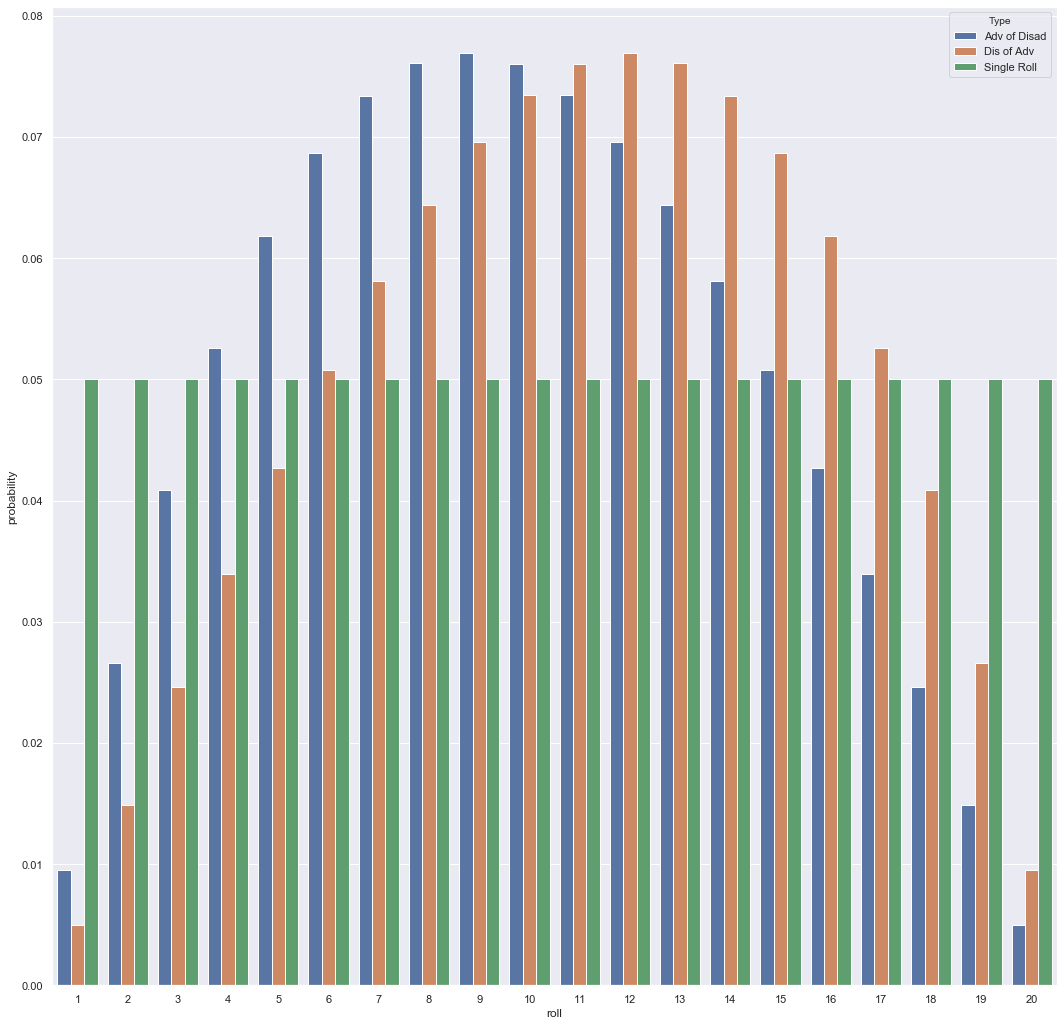

In [109]:
make_line_plot()

### Extra Credit: Suppose you need to roll N or better with your 20-sided die. For each value of N, is it better to use advantage of disadvantage, disadvantage of advantage or rolling a single die?
 
Looking at a plot of $P[X<=n]$ for each of the roll types we can see that Disadvantage of Advantage is best for values $N<=13$, but for $N>13$ a single roll is the best option. 

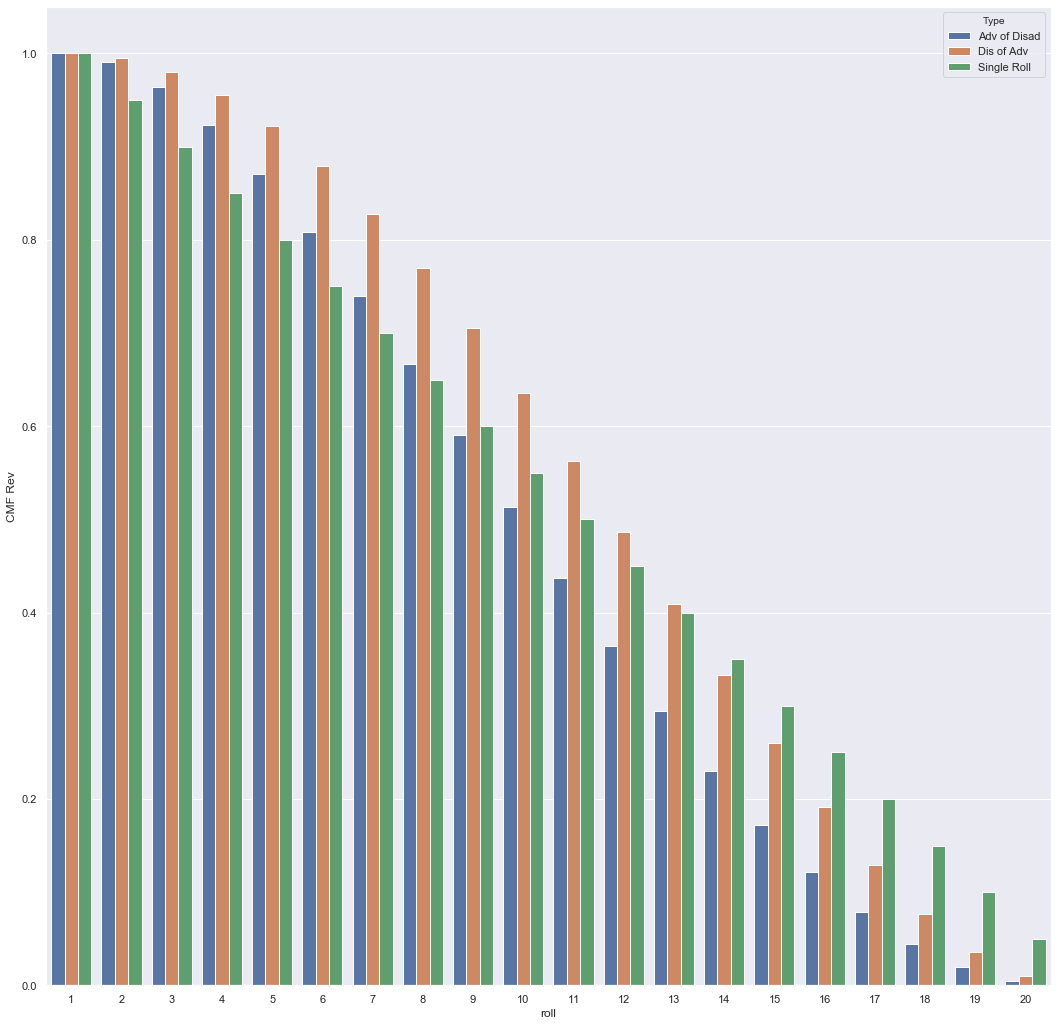

In [110]:
make_line_plot(yaxis='CMF Rev')

In [75]:
class Dice: 
    
    def __init__(self, n_sides=20):
        self.n_sides = n_sides 
        
    
    def single_roll(self, n_rolls=1):
        sides = self.n_sides
        return np.random.randint(1, sides+1)
    
    def roll_advantage(self):
        return np.max([self.single_roll(), self.single_roll()])
    
    def roll_disadvantage(self):
        return np.min([self.single_roll(), self.single_roll()])
    
    
    def roll_advantage_of_disadvantage(self):
        return np.max([self.roll_disadvantage(), self.roll_disadvantage()])
    
    def roll_disadvantage_of_advantage(self):
        return np.max([self.roll_disadvantage(), self.roll_disadvantage()])
    

    def __str__(self):
        return 'Dice with '+str(self.n_sides)
    

In [82]:
def simulate(num_trials=100):
    results_df = pd.DataFrame(columns=['roll_type', 'results'])
    for i in range(num_trials):
        die = Dice(n_sides=20)
        results_df=results_df.append({'results': die.roll_advantage_of_disadvantage(), 
                'roll_type':'Adv of Disadv'},ignore_index=True)
        
        results_df=results_df.append({'results': die.roll_advantage_of_disadvantage(), 
                'roll_type':'Disadv of Adv'},ignore_index=True)

    counts_df= pd.pivot_table(results_df, index=['roll_type', 'results'], aggfunc=len).reset_index()
    counts_df = counts_df.rename({0:'counts'}, axis='columns')
    counts_df['proportion'] = counts_df['counts'].apply(lambda x: x/num_trials)
    return counts_df

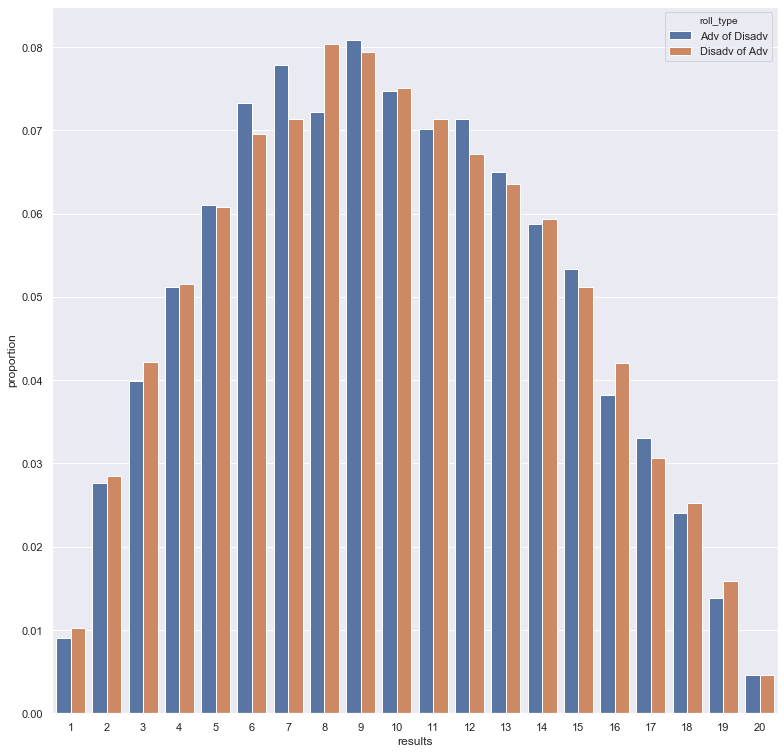

In [87]:
sns.barplot(x='results', y='proportion', hue='roll_type' ,data =simulate(num_trials=10000))